In [39]:
import cv2
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

**ЗАДАЧА 1.** С использованием средств библиотеки Pandas сформировать DataFrame, который будет содержать 2 колонки - название класса и абсолютный путь к файлу.

In [3]:
df = pd.read_csv('annotation.csv')
df_new = df.iloc[:, [0, 2]]

print(df_new)

                                          Absolute path  Class name
0     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
1     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
2     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
3     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
4     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
...                                                 ...         ...
2197  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear
2198  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear
2199  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear
2200  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear
2201  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear

[2202 rows x 2 columns]


**ЗАДАЧА 2.** Произвести именование колонок сформированного DataFrame в соответствии с рекомендациями, полученными на соответствующей лекции.

In [4]:
df_new.rename( columns={'Absolute path':'absPath', 'Class name':'className'}, inplace=True)

print(df_new)

                                                absPath   className
0     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
1     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
2     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
3     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
4     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear
...                                                 ...         ...
2197  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear
2198  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear
2199  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear
2200  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear
2201  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear

[2202 rows x 2 columns]


C:\Users\nozdr\AppData\Local\Temp\ipykernel_16260\1777109374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename( columns={'Absolute path':'absPath', 'Class name':'className'}, inplace=True)


 **ЗАДАЧА 3.** Добавить в DataFrame столбец, который будет содержать числовую метку **0** для первого класса, **1** для второго класса.

In [25]:
df_new['mark'] = df_new['className'].apply(lambda name: 0 if name == 'polar_bear' else 1)

print(df_new)

                                                absPath   className  mark  \
0     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
2     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
3     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
4     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
...                                                 ...         ...   ...   
2197  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   
2198  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   
2199  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   
2200  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   
2201  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   

      height  width  depth   pixels  
0        305    480      3   146400  

**ЗАДАЧА 4.** Добавить в DataFrame три столбца, первый из которых содержит информацию о высоте изображения, второй о ширине, а третий о глубине (количество каналов).

In [26]:
df_new['height'] = df_new['absPath'].apply(lambda path: cv2.imread(path).shape[0])

In [27]:
df_new['width'] = df_new['absPath'].apply(lambda path: cv2.imread(path).shape[1])

In [28]:
df_new['depth'] = df_new['absPath'].apply(lambda path: cv2.imread(path).shape[2])

In [29]:
print(df_new)

                                                absPath   className  mark  \
0     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
2     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
3     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
4     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
...                                                 ...         ...   ...   
2197  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   
2198  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   
2199  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   
2200  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   
2201  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  brown_bear     1   

      height  width  depth   pixels  
0        305    480      3   146400  

**ЗАДАЧА 5.** С использованием Pandas вычислить статистическую информацию для столбцов, содержащих информацию о размерах изображения (ширина, высота, глубина) и метках класса. На основе полученной информации определить, является ли собранный вами набор сбалансированным (на основе статистической информации о столбце с метками класса).

In [30]:
df_new['height'].describe()

count    2202.000000
mean      821.698002
std       548.033245
min       210.000000
25%       320.000000
50%       764.500000
75%      1200.000000
max      3000.000000
Name: height, dtype: float64

In [31]:
df_new['width'].describe()

count    2202.000000
mean     1156.919619
std       791.521250
min       180.000000
25%       480.000000
50%       960.000000
75%      1920.000000
max      3000.000000
Name: width, dtype: float64

In [32]:
df_new['depth'].describe()

count    2202.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: depth, dtype: float64

In [33]:
df_new['mark'].describe()

count    2202.000000
mean        0.500000
std         0.500114
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: mark, dtype: float64

**ЗАДАЧА 6.** Написать функцию, которая на вход принимает DataFrame и метку класса, а возвращает отфильтрованный по метке DataFrame. Условие фильтрации - в новый DataFrame включаются те строки, для которых значение метки соответсвует заданному.

In [34]:
def mark_df(df_new: pd.DataFrame, mark: int) -> pd.DataFrame:
    """
    This function accepts a DataFrame and a class label, then 
    filters the DataFrame by the specified class label and 
    returns a new DataFrame containing only rows with this class label.
    """
    df_new= df_new[df_new.mark == mark]
    return df_new

print(mark_df(df_new, 0))


                                                absPath   className  mark  \
0     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
2     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
3     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
4     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
...                                                 ...         ...   ...   
1096  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1097  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1098  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1099  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1100  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   

      height  width  depth   pixels  
0        305    480      3   146400  

**ЗАДАЧА 7.** Написать функцию, которая на вход принимает метку класса, максимальное значение ширины и максимальное значение высоты изображения, а возвращает отфильтрованный по заданным параметрам DataFrame. Условие фильтрации - в новый DataFrame включаются те строки, для которых размеры удовлетворяют следующему условию: **height <= max_height** and **width <= max_width**, а метка класса соответствует указанной.

In [35]:
def redf(df: pd.DataFrame, mark: int, max_h: int, max_w: int) -> pd.DataFrame:
    """
    The redf function takes a DataFrame, a class label (mark), and maximum width and 
    height values (max_w and max_h, respectively), filters the DataFrame by these 
    conditions, and returns the filtered DataFrame
    """
    d = df[(df['mark'] == mark) & (df['height'] <= max_h) & (df['width'] <= max_w)]
    return d

print(redf(df_new, 0, 1400, 1100))

                                                absPath   className  mark  \
0     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
2     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
3     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
4     C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
...                                                 ...         ...   ...   
1078  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1091  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1093  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1096  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   
1100  C:\Users\nozdr\Desktop\DP\DataProcessing\datas...  polar_bear     0   

      height  width  depth   pixels  
0        305    480      3   146400  

**ЗАДАЧА 8.** Выполнить группировку DataFrame по метке класса с вычислением максимального, минимального и среднего значения по количеству пикселей (необходимо будет добавить новый столбец, значение для которого вычисляется по уже заполненным столбцам. О подсчете количества пикселей говорилось на лекции OpenCV).

In [36]:
df_new["pixels"] = df_new['height'] * df_new['width']
n_df= df_new.groupby("mark").agg({"pixels": ['max', 'min', 'mean']}) 
print(n_df)

       pixels                     
          max    min          mean
mark                              
0     8898000  57600  1.434215e+06
1     9000000  57600  1.263272e+06


**ЗАДАЧА 9.** Написать функцию, которая с использованием средств библиотеки OpenCV строит гистограмму. На вход функция принимает DataFrame и метку класса, на выходе - три массива (каждый массив соответствует значениям гистограммы по каждому каналу). Выбор изображения из DataFrame, для которого будет строиться гистограмма, сделать случайным.

In [100]:
def get_hist(df: pd.DataFrame, mark: int) -> np.ndarray:
    """
    The function provides obtaining histograms of images 
    from a DataFrame using the OpenCV library
    """
    df_m = mark_df(df, mark)
    img = cv2.imread(df_m['absPath'][random.randint(0, len(df_m) - 1)])
    h = []
    for i in range(1 if len(img.shape) == 2 else img.shape[2]):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        h.append(hist)
    return h, img

**ЗАДАЧА 10.** С использованием средств библиотеки matplotlib выполнить отрисовку гистограмм, которые возвращаются из функции пункта 9. Графики и оси должны иметь соответствующие подписи.

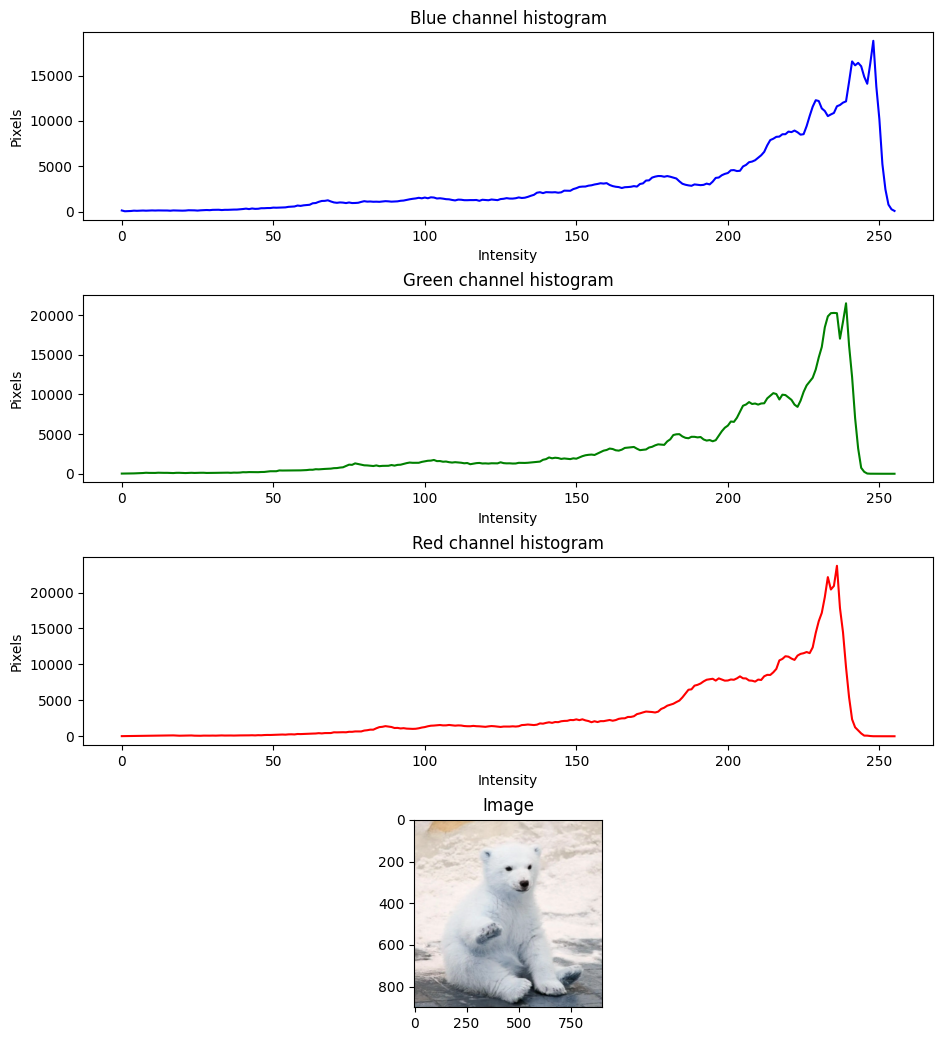

In [117]:
h, img = get_hist(df_new, 0)

fig = plt.figure(figsize=(10, 15))
plt.subplots_adjust(bottom=0.2, top=0.85, wspace=0.3, hspace=0.4, left=0.1, right=0.95)

fig.add_subplot(4, 1, 1)
plt.title('Blue channel histogram')
plt.plot(h[0], color = 'b')
plt.xlabel('Intensity')
plt.ylabel('Pixels')

fig.add_subplot(4, 1, 2)
plt.title('Green channel histogram')
plt.plot(h[1], color = 'g')
plt.xlabel('Intensity')
plt.ylabel('Pixels')

fig.add_subplot(4, 1, 3)
plt.title('Red channel histogram')
plt.plot(h[2], color = 'r')
plt.xlabel('Intensity')
plt.ylabel('Pixels')

fig.add_subplot(4, 1, 4)
plt.title('Image')
plt.imshow(img)
